<a href="https://colab.research.google.com/github/tahereh220/EmergingClass/blob/main/template02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import cv2

In [2]:
# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

In [3]:
import pathlib

data = pathlib.Path('/content/drive/MyDrive/Aneesh-shared/ML class/DataSets/Traing_dataset') 
count = len(list(data.glob('*/*.*')))
count


780

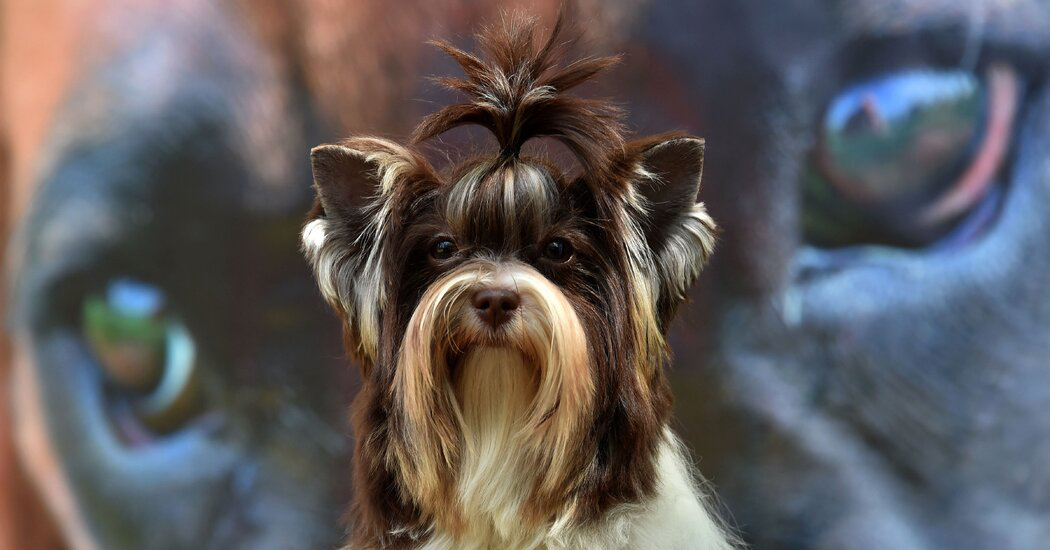

In [4]:
dogs = list(data.glob('Dog-Training/*'))
PIL.Image.open(str(dogs[50]))

In [5]:
print(dogs[50])
print(type(dogs[50]))

/content/drive/MyDrive/Aneesh-shared/ML class/DataSets/Traing_dataset/Dog-Training/071.jpg
<class 'pathlib.PosixPath'>


In [6]:
dog_paths = [str(x) for x in dogs]
print(dog_paths[50])
print(type(dog_paths[50]))


/content/drive/MyDrive/Aneesh-shared/ML class/DataSets/Traing_dataset/Dog-Training/071.jpg
<class 'str'>


In [7]:
dog_images = [cv2.imread(x) for x in dog_paths]
# print(dog_images[50])

In [8]:
cats = list(data.glob('Cat-Training/*'))
# PIL.Image.open(str(cats[50]))
cat_paths = [str(x) for x in cats]
cat_images = [cv2.imread(x) for x in cat_paths]

In [9]:
horses = list(data.glob('Horse-Training/*'))
# PIL.Image.open(str(horses[100]))
horse_paths = [str(x) for x in horses]
horse_images = [cv2.imread(x) for x in horse_paths]

In [10]:
print(np.shape(dog_images[50]))
print(type(dog_images[50]))

(550, 1050, 3)
<class 'numpy.ndarray'>


In [11]:
#resize images

dog_images = [cv2.resize(x,(224, 224)) for x in dog_images]
cat_images = [cv2.resize(x,(224, 224)) for x in cat_images]
horse_images = [cv2.resize(x,(224, 224)) for x in horse_images]

In [12]:
print(np.shape(dog_images[50]))
print(type(dog_images[50]))

(224, 224, 3)
<class 'numpy.ndarray'>


In [13]:
# Normalize all images
normalized_dog_images = [(x.astype(np.float32) / 127.0) - 1 for x in dog_images]
normalized_cat_images = [(x.astype(np.float32) / 127.0) - 1 for x in cat_images]
normalized_horse_images = [(x.astype(np.float32) / 127.0) - 1 for x in horse_images]

In [14]:
print(np.shape(normalized_dog_images))
print(np.shape(normalized_cat_images))
print(np.shape(normalized_horse_images))

(231, 224, 224, 3)
(258, 224, 224, 3)
(260, 224, 224, 3)


In [15]:
input_train = np.concatenate((normalized_dog_images, normalized_cat_images, normalized_horse_images), axis=0)
print(np.shape(input_train))
print(type(input_train))

(749, 224, 224, 3)
<class 'numpy.ndarray'>


In [16]:
np.shape(normalized_dog_images)[0]

231

In [17]:
print(np.full(np.shape(normalized_dog_images)[0], 0))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [18]:
output_train = np.concatenate(((np.full(np.shape(normalized_dog_images)[0], 0)), 
                               (np.full(np.shape(normalized_cat_images)[0], 1)), 
                               (np.full(np.shape(normalized_horse_images)[0], 2))), axis=0)

In [19]:
print(np.shape(output_train))

(749,)


In [20]:
# Load the model
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Animals/AnimalDetect.h5')


# optimizer = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# model.compile(optimizer=optimizer,
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])


model.summary()  # let's have a look at our model so far


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1280)              410208    
                                                                 
 sequential_3 (Sequential)   (None, 3)                 128400    
                                                                 
Total params: 538,608
Trainable params: 524,528
Non-trainable params: 14,080
_________________________________________________________________


In [21]:
# compile with (optimizer, loss, metrics)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# fit/training
# Define some parameters for the loader:

history = model.fit(input_train, output_train, batch_size=16, epochs=5, shuffle=True, verbose=2)

# print("Evaluate:")
# model.evaluate(x_test,  y_test, verbose=2)

# # 1) Save whole model
# # two formats: SavedModel or HDF5
# model.save("nn")  # no file ending = SavedModel
# model.save("nn.h5")  # .h5 = HDF5

# new_model = keras.models.load_model("nn.h5")

# # 2) save only weights
# model.save_weights("nn_weights.h5")

# # initilaize model first:
# # model = keras.Sequential([...])
# model.load_weights("nn_weights.h5")

# # 3) save only architecture, to_json
# json_string = model.to_json()

# with open("nn_model.json", "w") as f:
#     f.write(json_string)

# with open("nn_model.json", "r") as f:
#     loaded_json_string = f.read()

# new_model = keras.models.model_from_json(loaded_json_string)
# print(new_model.summary())




Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


47/47 - 65s - loss: 1.1968 - accuracy: 0.7730 - 65s/epoch - 1s/step
Epoch 2/5
47/47 - 56s - loss: 0.3117 - accuracy: 0.8945 - 56s/epoch - 1s/step
Epoch 3/5
47/47 - 56s - loss: 0.1415 - accuracy: 0.9453 - 56s/epoch - 1s/step
Epoch 4/5
47/47 - 56s - loss: 0.0864 - accuracy: 0.9720 - 56s/epoch - 1s/step
Epoch 5/5
47/47 - 56s - loss: 0.0658 - accuracy: 0.9813 - 56s/epoch - 1s/step


In [22]:
# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

In [32]:
# The path to the image
path = '/content/drive/MyDrive/Colab Notebooks/Animals/Testing/test15.jpg'
image = cv2.imread(path)
#image = cam.read()



In [33]:
image = cv2.resize(image,(224, 224))

In [34]:
#Convert the image into an array
image_array = np.asarray(image)

In [35]:
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

In [36]:
# Put the image into the array
data[0] = normalized_image_array

In [37]:
# run the inference
prediction = model.predict(data)
print(prediction)

[[0.0476977 0.9522984 0.0000039]]


In [38]:
for i in prediction:
  if i[0] > 0.7:
    text ="Dog"
  if i[1] > 0.7:
    text ="Cat"
  if i[2] > 0.7:
    text ="Horse" 

In [39]:
print(text)

Cat
